### Подготовка текста субтитров

In [1]:
import pysrt
import pandas as pd
import re
import seaborn as sns

In [2]:
# загрузка списка файлов субтитров, удаление ненужных строк, удаление дупликатов, приведение к типам

df_loaded = pd.read_csv('fil_sub_download_temp_file.csv', sep=';', names=['imdb_id','moviename', 'data','file'])
df_loaded.drop(df_loaded[df_loaded.moviename == 'ERROR'].index, inplace=True)
df_loaded = df_loaded.drop_duplicates(subset='imdb_id')
df_loaded.insert(4,'subs_text','')
df_loaded = df_loaded.astype({'imdb_id': 'int32','moviename': 'string','data': 'object','file': 'object','subs_text': 'string'})
df_loaded = df_loaded[['imdb_id','subs_text','file']]
df_loaded = df_loaded.reset_index(drop=True)
df_loaded

,imdb_id,subs_text,file
0,76759,,{'1951740969': '/home/eva/Diploma/os/0076759.s...
1,109830,,{'1952039423': '/home/eva/Diploma/os/0109830.s...
2,169547,,{'1953328037': '/home/eva/Diploma/os/0169547.s...
3,168629,,{'1953190010': '/home/eva/Diploma/os/0168629.s...
4,119116,,{'1952183249': '/home/eva/Diploma/os/0119116.s...
...,...,...,...
1202,1255953,,{'1954468636': '/home/eva/Diploma/os/1255953.s...
1203,91706,,{'1954791961': '/home/eva/Diploma/os/91706.srt'}
1204,424237,,{'244823': '/home/eva/Diploma/os/424237.srt'}
1205,67388,,{'1955352398': '/home/eva/Diploma/os/67388.srt'}


In [3]:
# удаление "кривых субтитров"
df_loaded = df_loaded.drop(df_loaded[df_loaded.file.str.contains('1038685.srt')].index)
df_loaded

,imdb_id,subs_text,file
0,76759,,{'1951740969': '/home/eva/Diploma/os/0076759.s...
1,109830,,{'1952039423': '/home/eva/Diploma/os/0109830.s...
2,169547,,{'1953328037': '/home/eva/Diploma/os/0169547.s...
3,168629,,{'1953190010': '/home/eva/Diploma/os/0168629.s...
4,119116,,{'1952183249': '/home/eva/Diploma/os/0119116.s...
...,...,...,...
1202,1255953,,{'1954468636': '/home/eva/Diploma/os/1255953.s...
1203,91706,,{'1954791961': '/home/eva/Diploma/os/91706.srt'}
1204,424237,,{'244823': '/home/eva/Diploma/os/424237.srt'}
1205,67388,,{'1955352398': '/home/eva/Diploma/os/67388.srt'}


In [4]:
def clean_text(text):

    # очистка текста субтитров от ненужных символов

    text = text.lower()
    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'em", " them", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)

    text = re.sub(r"<i>", " ", text)
    text = re.sub(r"</i>", " ", text)
    text = text.replace('\n',' ')
    text = text.replace('   ',' ')
    text = text.replace('  ',' ')

    text = re.sub(r"[-()\"#/@;§:<>{}`+=~|.!?,]", "", text)

    return text

In [5]:
def load_subs(path):

    # пакетная очистка субтитров от ненужных символов

    with open(path, 'r') as sf:

        lines = sf.readlines()

        if re.search(r'{\d+}', lines[0]) is not None:
            del lines[0]
            del lines[-1]
            lines = ''.join(lines)
            subs_text = re.sub(r'{\d+}','',lines)
        elif re.search(r'\[\d+\]', lines[0]) is not None:
            del lines[0]
            del lines[-1]
            lines = ''.join(lines)
            subs_text = re.sub(r'\[\d+\]','',lines)
        else:
            subs = pysrt.open(path)
            print(path)
            del subs[0]
            del subs[-1]
            subs_text = subs.text
            
    subs_text = clean_text(subs_text)
            
    return subs_text

In [6]:
# загрузка субтитров из файлов в датафрейм

for imdb_id, sub in zip(df_loaded.imdb_id, df_loaded.file):
    path, = eval(sub).values()
    df_loaded.loc[df_loaded.imdb_id == imdb_id,'subs_text'] = load_subs(path)

df_subs = df_loaded[['imdb_id','subs_text']].copy(deep=True)

# df_subs[df_subs['subs_text'].str.contains('OpenSubtitles')]

/home/eva/Diploma/os/0076759.srt
/home/eva/Diploma/os/0109830.srt
/home/eva/Diploma/os/0169547.srt
/home/eva/Diploma/os/0168629.srt
/home/eva/Diploma/os/0119116.srt
/home/eva/Diploma/os/0017136.srt
/home/eva/Diploma/os/0325980.srt
/home/eva/Diploma/os/0266697.srt
/home/eva/Diploma/os/0411705.srt
/home/eva/Diploma/os/0462538.srt
/home/eva/Diploma/os/0338013.srt
/home/eva/Diploma/os/0399146.srt
/home/eva/Diploma/os/0120586.srt
/home/eva/Diploma/os/0082971.srt
/home/eva/Diploma/os/0430051.srt
/home/eva/Diploma/os/0087469.srt
/home/eva/Diploma/os/0097576.srt
/home/eva/Diploma/os/0086960.srt
/home/eva/Diploma/os/0120591.srt
/home/eva/Diploma/os/0092644.srt
/home/eva/Diploma/os/0172495.srt
/home/eva/Diploma/os/0120735.srt
/home/eva/Diploma/os/0110413.srt
/home/eva/Diploma/os/0315543.srt
/home/eva/Diploma/os/0088763.srt
/home/eva/Diploma/os/0243862.srt
/home/eva/Diploma/os/0374546.srt
/home/eva/Diploma/os/0118715.srt
/home/eva/Diploma/os/0120737.srt
/home/eva/Diploma/os/0167261.srt
/home/eva/

In [12]:
# подчёт слов в субтитрах, фильтрация по кол-ву слов не более 15000

df_subs['subs_len'] = df_subs['subs_text'].apply(lambda x: len(x.split()))
df_subs = df_subs[df_subs['subs_len'] <= 15000]
df_subs = df_subs.set_index('imdb_id')
df_subs.sort_values(by='subs_len')

,subs_text,subs_len
imdb_id,,
20163,people on sunday premiered in berlin in februa...,389
15324,there is an old proverb which says do not try ...,422
89338,hey whatˇżs the hurry mark wait thatˇżs blood ...,465
60782,narrator this is a story of long long ago when...,581
60736,a hundred years ago africa was a vast dark unk...,633
...,...,...
88850,outside we got one to go one out to go all rig...,14411
1251757,i had several million dollars in a duffle bag ...,14517
65377,attention attention please continental airline...,14746


<Axes: xlabel='subs_len', ylabel='Count'>

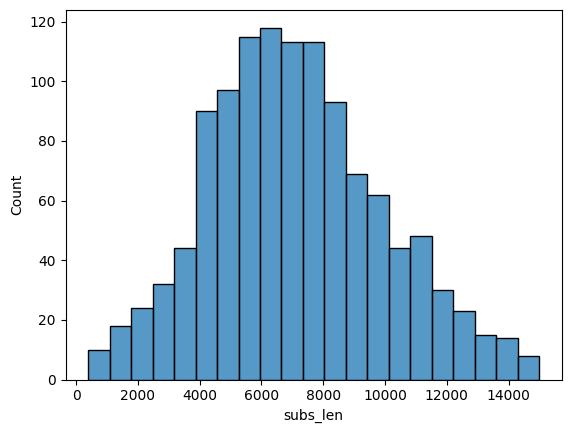

In [8]:
sns.histplot(data=df_subs['subs_len'])

In [16]:
df_kw = pd.read_csv('df_keylist_fifteen.csv', sep=';', index_col='imdb_id')
df_kw

,keylist_fifteen
imdb_id,
76759,"['android', 'spaceopera', 'rebellion', 'planet..."
109830,"['basedonnovel', 'love', 'friendship', 'flashb..."
169547,"['nudity', 'femalenudity', 'malenudity', 'comi..."
168629,"['murder', 'friendship', 'smalltown', 'robbery..."
119116,"['love', 'alien', 'newyorkcity', 'future', 'sh..."
...,...
66516,"['corruption', 'sex', 'sexuality', 'allegory',..."
1255953,"['prison', 'middleeast', 'rape', 'muslim', 'mi..."
91706,"['murder', 'police', 'drug', 'losangeles', 'sh..."


In [19]:
df = df_kw.join(df_subs['subs_text'])

In [20]:
df

,keylist_fifteen,subs_text
imdb_id,,
76759,"['android', 'spaceopera', 'rebellion', 'planet...",did you hear that they shut down the main reac...
109830,"['basedonnovel', 'love', 'friendship', 'flashb...",hello my name's forrest forrest gump do you wa...
169547,"['nudity', 'femalenudity', 'malenudity', 'comi...",i need a father who is a role model not some ...
168629,"['murder', 'friendship', 'smalltown', 'robbery...",you are sweating i know i am excited though ...
119116,"['love', 'alien', 'newyorkcity', 'future', 'sh...",come come please aziz aziz aziz light aziz lig...
...,...,...
66516,"['corruption', 'sex', 'sexuality', 'allegory',...",valerie and her week of wonders translated by ...
1255953,"['prison', 'middleeast', 'rape', 'muslim', 'mi...",i am glad to see you please the twins last wil...
91706,"['murder', 'police', 'drug', 'losangeles', 'sh...",is anybody there woohoo yeah daryl has to wo...


In [21]:
df.to_csv('df_kw_subs.csv', sep=';')